# Exploring Why Civil Resistance Works

## Credentials

### Name: Sergi / Σέργκι / ΣΕΡΓΚΙ
### Surname: Pula / Πούλα / ΠΟΥΛΑ
### AM: 8200141
### Email: t8200141@aueb.gr

In this survey our goal is to check whether Civil Resistance can work out instead of violent acts. 

First of all, all of our data are between the years 1945 and 2014. Also our data includes 389 maximalist campaigns.
Our goal now is to explain the columns and make some remarks in some values for better understanding of out data.

Let's import the most basic and important libraries for visualization and data analysing.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Now, we import our dataset.

In [2]:
file_path = 'NAVCO 1.2 Updated.tab'

df = pd.read_csv(file_path, delimiter='\t')

We want to print all the columns of each dataframe regardless of it's size.

In [3]:
pd.set_option('display.max_columns', None)

We check out the types of our dataframe's columns, we see that we are using mainly float values and objects.

In [4]:
df.dtypes

NAVCOID                           float64
CAMPAIGN                           object
LOCATION                           object
BYEAR                             float64
EYEAR                             float64
TARGET                             object
SUCCESS                           float64
LIMITED                           float64
FAILURE                           float64
ONGOING                           float64
NONVIOL                           float64
VIOL                              float64
REGCHANGE                         float64
FSELFDET                          float64
SECESSION                         float64
OTHER                             float64
DURATION                          float64
PARTICIPATION                     float64
PERCENTAGEPOPULARPARTICIPATION    float64
REGVIOL                           float64
DEFECT                            float64
VIOLENTFLANK                      float64
VIOLSIM                           float64
REGAID                            

### Column Explanation

* NAVCO ID : The unique id of each 'Nonviolent And Violent Campaigns and Outcomes'
* Campaign: The name of the campaign
* Location: The location were the campaign took place
* BYEAR: Year when the campaign started.
* Eyear: Year when the campaign reached it's peak.
* TARGET: Target of the campaign.
* Success: binay value (1.0 or 0.0), shows if the campaign reached all of it's goals in one year from the start of the peack season.
* LIMITED: binary value, shows that the campaign managed some of it's goals, for example reforms in the governments to stop the campaign.
* FAILURE: binary value, shows that the campaign failed in all of it's goals.
* ONGOING: binary value, the campaign still happends till today **(today = 2014!!)**
* NONVIOL: binary value, the campaign was non violent.
* VIOL: binary value, the campaign was violent.
* REGCHANGE: binary value, shows that the goal is to remove national leader or exclude foreigns occupiers.
* FSELFDET: binary value, the goal is independence from leader or foreigns occupiers.
* SECESSION: binary value, the goal is self determination.
* OTHER: binary value, the goal is something different that the three mentioned above.
* DURATION: how much the campaign last, **in days**.
* PARTICIPATION: how many participated in the peak point.
* PERCENTAGEPOPULAPARTICIPATION: percent of national population involved in the peak point.
* REGVIOL: Now from the perspective of the regime, binary value, shows if the regime user violence against the campaign.
* DEFECT: binary values, shows if the forces of the regime showed noncooperation during the conflict.
* VIOLENT FLANK: binary values, shows whether some of the people of the campaign used violence while the campaign was non violent.
* VIOLSIM: binary values, shows if there was another violent campaign active (for example independent terrorist groups).
* REGAID: binary values, if the targed used military or aid assist from other nations.
* STATESUP: binary values, if the campaign used military or aid assist from other nations.

### Αssumptions we need to make for our data to be valid.

* If the peak of a campaign is not known or recognized exactly we consider it to be the year when the campaign was over.
* If a campaign is ongoing till 2014 and after, we consider it as failure.

### Cleaning and some explanations

First we drop off any rows with nan values.

In [5]:
df = df.dropna(how='all')

For investigative purposes we find out that we have 220 campaigns with violent acts and 169 non violent ones.

In [6]:
violent_count = df[df['VIOL'] == 1.0]['VIOL'].count()
violent_count

220

In [7]:
non_violent_count = df[df['NONVIOL'] == 1.0]['NONVIOL'].count()
non_violent_count

169

We also calculate the margin between them as a percentage, we have nearly 23%. 

In [8]:
percentage_difference = abs(((non_violent_count - violent_count) / violent_count) * 100)

In [9]:
percentage_difference

23.18181818181818

In [10]:
def round_to_nearest_decade(year):
    return round(year / 10) * 10

To create decades for our survey needs, we are turning the column 'BYEAR' to integer.

In [11]:
df['BYEAR'] = df['BYEAR'].astype(int)

We know that our date data range between 1940 and 2014 so we place the bins in ranges accordingly.

In [12]:
df['Decade'] = pd.cut(df['EYEAR'], bins=range(1940, 2021, 10), right=False, labels=range(1940, 2020, 10))


## Frequency of nonviolent and violent campaigns

For our first step in this survey we want to calculate the non violent and violent campaigns and depict them in plot graphs.

So, we calculate and print both non violent and violent campaigns finding the appropriate column, grouping by decade and counting the campaigns per decade.

In [13]:
non_violent_campaigns_per_decade = df[df['VIOL'] == 0.0].groupby('Decade').size()

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\1286135778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_violent_campaigns_per_decade = df[df['VIOL'] == 0.0].groupby('Decade').size()


In [14]:
non_violent_campaigns_per_decade

Decade
1940     2
1950     9
1960     8
1970    13
1980    30
1990    36
2000    37
2010    34
dtype: int64

In [15]:
violent_campaigns_per_decade = df[df['VIOL'] == 1.0].groupby('Decade').size()

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\2057063568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  violent_campaigns_per_decade = df[df['VIOL'] == 1.0].groupby('Decade').size()


In [16]:
violent_campaigns_per_decade

Decade
1940    12
1950    25
1960    21
1970    27
1980    17
1990    54
2000    23
2010    41
dtype: int64

Now we are plotting the two graphs stacked one upon the other. 

**Explanation Of Our Graph:**
* The figure size will have these dimension: 9x6
* First we plot the 'Blue' graph using the .index for the decades and the .values for the violent counts.
* For the same plot we use the .fill_between to fill the space underneath it with the color we want.
* For the second one we follow the same procedure with one basic difference: The plot is graphed in the height of the peak of the first graph and above. We can see that as we add the values of the previous graph and then sum them with the values of the current graph.
* **Zorder:** We are using this for the layout architecture, we want the graphs to be above the grid so it doesn't mess with the visualization.
* 'plt.legend(loc='upper left')' here show the labels and we set where the labels will be placed.
* "plt.ylim(0)" here we place where the graph will start, specifically in the buttom of the y axis.
* "plt.xlim(violent_campaigns_per_decade.index[0], violent_campaigns_per_decade.index[-1])" once again we place the graph in the start of the x axis and the peak right. Without this our graph would be centered in the middle.
* With the ".tick_params" we export the lines near each value in the x and y axis respectively.

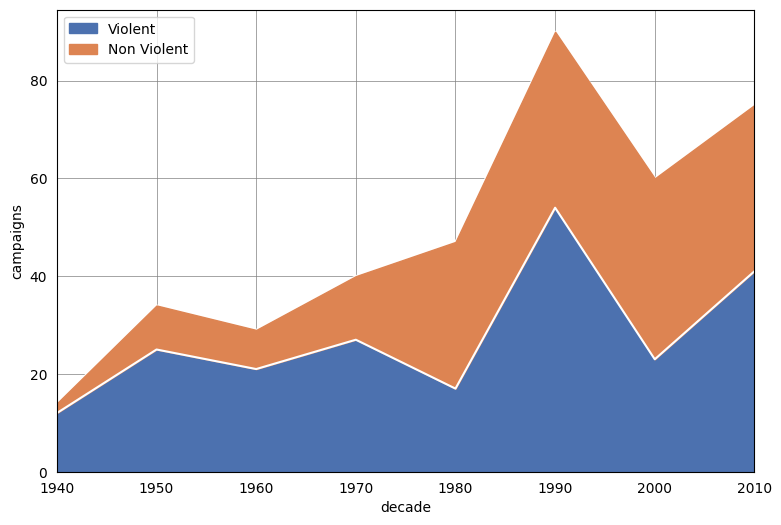

In [17]:
plt.figure(figsize=(9,6)) 

plt.plot(violent_campaigns_per_decade.index, violent_campaigns_per_decade.values, color='white')
plt.fill_between(violent_campaigns_per_decade.index, 0, violent_campaigns_per_decade.values, color = '#4C71AF', label='Violent', zorder=2)

plt.plot(non_violent_campaigns_per_decade.index, non_violent_campaigns_per_decade.values + violent_campaigns_per_decade.values, color='white')
plt.fill_between(non_violent_campaigns_per_decade.index, violent_campaigns_per_decade.values, non_violent_campaigns_per_decade.values + violent_campaigns_per_decade.values, color = '#DD8452', label = 'Non Violent', zorder=2)

plt.plot(violent_campaigns_per_decade.index, violent_campaigns_per_decade.values, color='white')

plt.xlabel('decade')
plt.ylabel('campaigns')
plt.legend(loc='upper left')
plt.ylim(0)
plt.xlim(violent_campaigns_per_decade.index[0], violent_campaigns_per_decade.index[-1])
plt.grid(color='gray', linewidth=0.5, zorder=0)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


plt.show()

## Number of nonviolent campaigns and the percentage of success per decade.

Now, in this part we want for **each** decade to plot bars for the success and amount of campaigns that were non violent respectively.

We have already calculated the non violent campaigns per decade from the previous part so we just print it out one more time for validation.

In [18]:
non_violent_campaigns_per_decade

Decade
1940     2
1950     9
1960     8
1970    13
1980    30
1990    36
2000    37
2010    34
dtype: int64

We calculate the non violent campaigns amount per decade that were succesfull.

In [19]:
counts_per_decade = df[(df['SUCCESS'] == 1.0) & (df['NONVIOL'] == 1.0)].groupby('Decade')['Decade'].count()


C:\Users\falin\AppData\Local\Temp\ipykernel_18332\2735402935.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_per_decade = df[(df['SUCCESS'] == 1.0) & (df['NONVIOL'] == 1.0)].groupby('Decade')['Decade'].count()


We find the total number of them so we can then count the percentages.

In [20]:
total_counts = counts_per_decade.sum()


In [21]:
total_counts

94

In [22]:
counts_per_decade

Decade
1940     1
1950     2
1960     2
1970     7
1980    14
1990    30
2000    25
2010    13
Name: Decade, dtype: int64

We merge the total non violent campaigns and the non violent campaigns that were specifically succesfull.

In [23]:
merged_data = pd.concat([non_violent_campaigns_per_decade, counts_per_decade], axis=1)


We rename the columns so they can be representive.

In [24]:
merged_data = merged_data.rename(columns={0: 'number_of_nonviolent_campaigns'})

In [25]:
merged_data = merged_data.rename(columns={'Decade': 'counts_per_decade_nonviol'})

In [26]:
merged_data

,number_of_nonviolent_campaigns,counts_per_decade_nonviol
Decade,,
1940,2,1
1950,9,2
1960,8,2
1970,13,7
1980,30,14
1990,36,30
2000,37,25
2010,34,13


For the success percentage we divide the non violent counts that are succesfull with the total non violent campaigns for each decade.

In [27]:
merged_data['percentage_success'] = merged_data['counts_per_decade_nonviol'] / merged_data['number_of_nonviolent_campaigns']

In [28]:
merged_data['percentage_success'] = merged_data['percentage_success'].round(2)

In [29]:
merged_data

,number_of_nonviolent_campaigns,counts_per_decade_nonviol,percentage_success
Decade,,,
1940,2,1,0.50
1950,9,2,0.22
1960,8,2,0.25
1970,13,7,0.54
1980,30,14,0.47
1990,36,30,0.83
2000,37,25,0.68
2010,34,13,0.38


Lastly, we plot the bars. Specifically in the x axis we place the data index which are the dates (decades), in the left y axis we create an ax in which we place the number of non violent campaigns and in the right y axis named ax1 we place the success percentage of the non violent campaigns.

**Explanation Of Our Graph:**
* We create the figure size.
* We create the ax using the arguments '111' which stands for 1 row, 1 column and 1 subplot.
* The ax2 is created using the twinx() method sharing the xaxis of the original axes('ax').
* The first bars we create are based on the number of nonviolent campaigns, the kind is set to bar, as ax we choose the ax we created before so the bars follow the values of the left y axis, we set a width between them and also a position in 1.1 so it will have some space with the bars we are going to create for the ax = ax2.
* So after this it is time for the ax2 for the column percentage success, again the kind is bar, the ax is based on the ax2, the position now is 0 so it will have space with the other bars per decade and we will not have stacking between them.
* "ax.set_xticks()" this is used for the placement of the decades in the x axis, we want them to be in the center between the two bars, so we place it accordingly.
* "ax.set_xticklabels" Here we place the decades and rotate them to be read easily.
* "ax.set_xlim" Here we create some space with the ax and ax2 axis so the bars won't touch them.
* Then we gather the legends of each ax and ax2 and using the .figure.legend we display them both in the up left corner managing their exact position with the bbox_to_anchor.
* Finally once again we use the .tick_params to delete the lines in the x axis for the decades.

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\3776856963.py:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.figure.legend(legends, labels = ['number of nonviolent campaigns', 'percentage success'], loc='upper left', bbox_to_anchor=(0.13, 0.88))


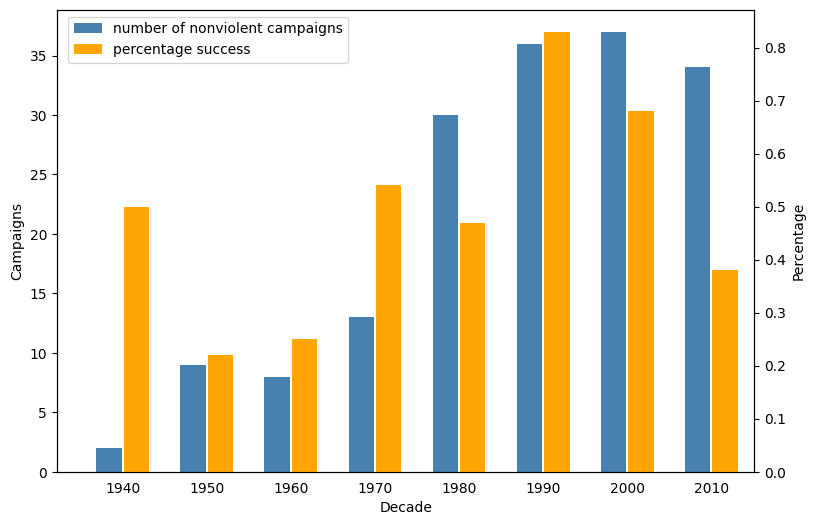

In [30]:
fig = plt.figure(figsize=(9,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()
bar_spacing = 0.2

width = 0.3
distance_between_decades = 0.6

merged_data['number_of_nonviolent_campaigns'].plot(kind='bar', color='#4880AF',  ax=ax, width=width, position=1 + 0.1 , label ='number of non violent campaigns' )

merged_data['percentage_success'].plot(kind='bar',color='#FFA505', ax=ax2, width=width, position = 0, label = 'percentage success')

ax.set_ylabel('Campaigns')
ax2.set_ylabel('Percentage')

ax.set_xticks(np.arange(len(merged_data.index)) + bar_spacing)
ax.set_xticklabels(merged_data.index, rotation=0, ha='right')
ax.set_xlim(-0.8, len(merged_data.index) - 0.5)

legends = [ax.get_legend(), ax2.get_legend()]
ax.figure.legend(legends, labels = ['number of nonviolent campaigns', 'percentage success'], loc='upper left', bbox_to_anchor=(0.13, 0.88))


ax.tick_params(axis='x', which='both', bottom=False, top=False)

plt.show()

**Conclusions:**
We can see that in the decades 1980 to 2010 we had an uprise in the non violent campaigns. As the years pass by the non violent ones start to compete. For this specific years that we have a lot of campaigns we also have good success percentages starting from 40% and ending up in the decades 1990-2000 to 80% and 65% respectively. 

### Success rate for violent and nonviolent campaigns by decade. 

Now, let's see the success rate for both violent and non violent throughout the decades so we can compare them.

Once again the violent campaigns per decade are already made from our first analyse.

So we are just printing them and placing them in a dataframe so we can merge them with the dataframe with the non violent campaign data.

In [31]:
violent_campaigns_per_decade

Decade
1940    12
1950    25
1960    21
1970    27
1980    17
1990    54
2000    23
2010    41
dtype: int64

In [32]:
violent_campaigns_per_decade = violent_campaigns_per_decade.to_frame(name='violent_campaigns')


In [33]:
violent_campaigns_per_decade

,violent_campaigns
Decade,
1940,12
1950,25
1960,21
1970,27
1980,17
1990,54
2000,23
2010,41


As we did with the non violent campaigns once again we calculate the success ones for each decade for the violent ones this time.

In [34]:
counts_per_decade_viol = df[(df['SUCCESS'] == 1.0) & (df['VIOL'] == 1.0)].groupby('Decade')['Decade'].count()

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\1489477605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_per_decade_viol = df[(df['SUCCESS'] == 1.0) & (df['VIOL'] == 1.0)].groupby('Decade')['Decade'].count()


In [35]:
counts_per_decade_viol = counts_per_decade_viol.to_frame(name='success_violent')


In [36]:
counts_per_decade_viol

,success_violent
Decade,
1940,6
1950,8
1960,4
1970,12
1980,5
1990,15
2000,3
2010,3


In [37]:
merged_data = pd.merge(merged_data, violent_campaigns_per_decade, left_index=True, right_index=True, how='left')
merged_data = pd.merge(merged_data, counts_per_decade_viol, left_index=True, right_index=True, how='left')

In [38]:
merged_data

,number_of_nonviolent_campaigns,counts_per_decade_nonviol,percentage_success,violent_campaigns,success_violent
Decade,,,,,
1940,2,1,0.50,12,6
1950,9,2,0.22,25,8
1960,8,2,0.25,21,4
1970,13,7,0.54,27,12
1980,30,14,0.47,17,5
1990,36,30,0.83,54,15
2000,37,25,0.68,23,3
2010,34,13,0.38,41,3


We are creating the column success_violent in which we are placing the success percentage (ranging from 0 to 1) for the violent campaigns.

In [39]:
merged_data['success_violent'] = merged_data['success_violent'] / merged_data['violent_campaigns']

In [40]:
merged_data['success_violent'] = merged_data['success_violent'].round(2)

### Explanation Of Our Graph:
* First we set the figure to 8x5 and the width we are going to use for the bars in 0.2
* We create the bars using position 0.9 and 2 respectively to place them one next to the other leaving some space between them.
* We set labels in y and x axis.
* We create the legend and also set Zorder to 2 so the labels will be above of the grid.
* Using the set_axisbelow() we place the grid below of our bars.
* We remove the lines next to each value of the x and y axis.
* We set a limit in x so the graph will start in the positions we want it to.

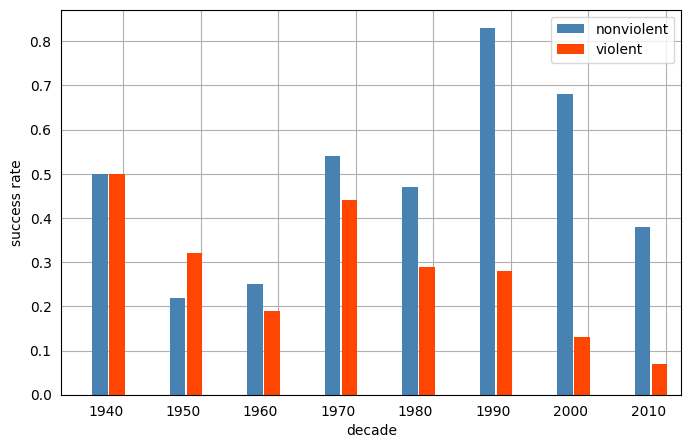

In [41]:
fig = plt.figure(figsize=(8,5)) 
width = 0.2

ax = merged_data['percentage_success'].plot(kind='bar',width = width, position = 2, color='#4882B3')
ax = merged_data['success_violent'].plot(kind='bar',width = width, position =0.9, color='#FF4502')
ax.set_ylabel('success rate')
ax.set_xticklabels(merged_data.index, rotation=0, ha='right')
ax.set_xlabel('decade')
legend = plt.legend(labels = ['nonviolent','violent'], loc='upper right', fancybox=True)
legend.set_zorder(2)
plt.grid(True)
ax.set_axisbelow(True)

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax.set_xlim(left=-0.8, right=len(merged_data.index)-0.8)

plt.show()

**Conclusions:**
Regardless of the decades 1940 and 1950 (which are considered less educational decades and are also followed by WW2) we see that in the following decades the marging between the non violent and violent ones is large with the non violent campaigns having bigger success rates. 

Warning!! Keep in mind that for the decades 1940 to 1960 we do not have many non violent campaigns so we can't actually compare them as the quality of our results may be inefficient. 

## 2. Largest Resistance Campaigns, 1946-2014

Now our goal is to create a barh plot in which we will show the campaigns with the largest participations and also if the campaigns succeeded their goals in whole, part of them or if they failed.

In [42]:
Resistance_Campaigns = df

Step 1 is to create the campaign names using the location (country) it occured and the Target (the opposing government) for whom the campaign started for.

In [43]:
Resistance_Campaigns['CAMPAIGN_NAME'] = Resistance_Campaigns['LOCATION'] + ':' + ' ' + Resistance_Campaigns['TARGET']

Now we will create a column with the participation as a percentage using the PERCENTAGEPOPULARPARTICIPATION column.

In [44]:
Resistance_Campaigns['Participation_Percentage'] = Resistance_Campaigns['PERCENTAGEPOPULARPARTICIPATION'] * 100 

In [45]:
Resistance_Campaigns['Participation_Percentage'] = round(Resistance_Campaigns['Participation_Percentage'], 2)

We will create a new dataframe using only the data in which the participation percentage is larger than 2%

In [46]:
Largest_Resistance_Campaigns = Resistance_Campaigns[Resistance_Campaigns['Participation_Percentage'] > 2.0]

We will sort them so we can check the graph from the largest one to the least large participated campaign.

In [47]:
Largest_Resistance_Campaigns = Largest_Resistance_Campaigns.sort_values(by = 'Participation_Percentage', ascending = True)

We import the FuncFormatter which is used in Matplotlib to customize the formatting of tick values on an axis. We will need it for the x axis.

In [48]:
from matplotlib.ticker import FuncFormatter

Our last step is to depict out findings into a graph. The graph below shows for each Campaign name (check y axis) the population that participated in it's peak event (in percentages, check x axis and also upon the bars), also we will see the bars colored, in this case we can see three outputs.
 * If the bar is black the campaign was successfull and it managed all of it's goals.
 * If the bar is grey the campaign manages some of the goals it had, for example the government made compromises.
 * If the bar is red then it failed.

Let's explain better then code we are using so the viewer can have an idea.
* 'color_map': here we match the number 1,2,3 to the colors they will represent in the graph.
* 'colors': Here for all the rows in our dataframe we check whether they were succesfull, failure or accomplished some of the goals and we place the correct number in each campaign id.
* bars: We create the bars horizondally, We must see better the way we place the colors, as the numbers are placed already in line and also each number corresponds to a color from the color_map we have created, so it just places the colors in the bars.
* In the 'for' loop we place the participation percentages upon each bar.
* We create grids for better understanding of our participation percentages.
* We create the labels that explain each color what it represents. It gets the 'key' out of the legend_labels and find the color it represents and place it in the rentangle with the legends labels.
* Finaly we place to the x axis the '%' next to each number (participation percentage) and show our graph.


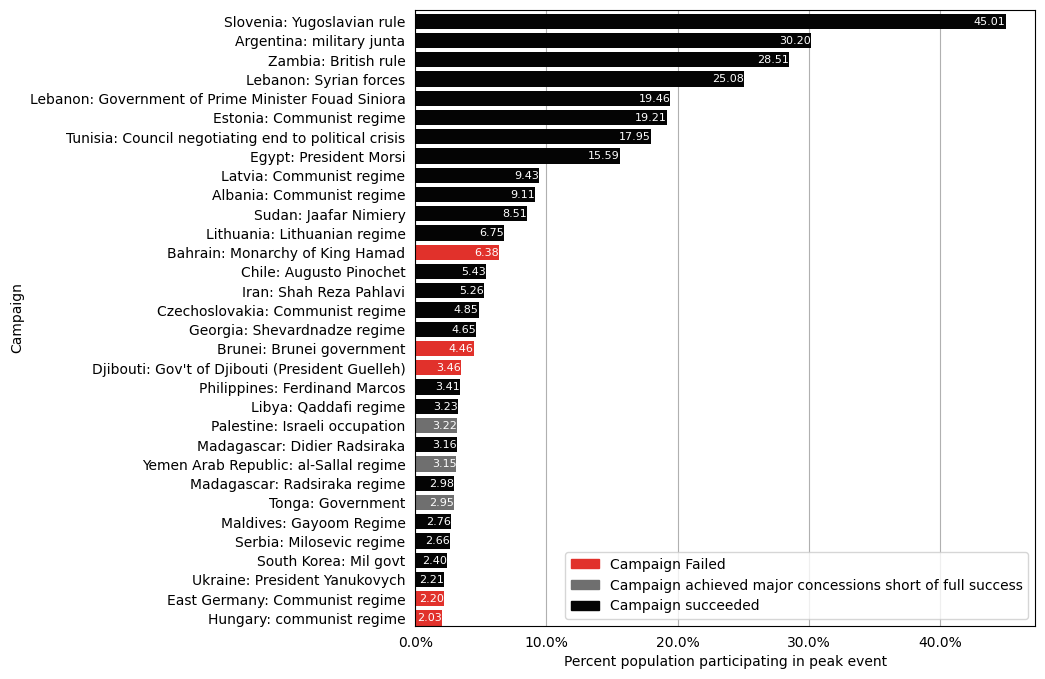

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
color_map = {1: '#E1312B', 2: '#6F6F6F', 3: '#040404'}
colors = Largest_Resistance_Campaigns.apply(lambda row: 1 if row['FAILURE'] == 1 else (2 if row['LIMITED'] == 1 else 3), axis=1)
bars = plt.barh(Largest_Resistance_Campaigns['CAMPAIGN_NAME'], Largest_Resistance_Campaigns['Participation_Percentage'],  color=[color_map[color] for color in colors], height=0.8)

plt.xlabel('Percent population participating in peak event')
plt.ylabel('Campaign')
for bar, value in zip(bars, Largest_Resistance_Campaigns['Participation_Percentage']):
    plt.text(bar.get_width() , bar.get_y() + bar.get_height()/2 , f'{value:.2f}',ha = 'right', va='center',  color='#FEFEFE', fontsize=8)

plt.grid(axis = 'x')
ax.set_axisbelow(True)

legend_lables = {1: 'Campaign Failed', 2: 'Campaign achieved major concessions short of full success', 3: 'Campaign succeeded'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[label]) for label in legend_lables.keys()]
plt.legend(legend_handles, legend_lables.values(), loc='lower right')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))
bar_spacing = 0.4
plt.ylim(-bar_spacing,len(Largest_Resistance_Campaigns)- bar_spacing )

plt.show()

**Conclusions:**
The graph above shows in the y axis each campaign and the Target it started against, in the x axis the percent of the population that participated specifically in the peak event. As we see we have some bars. For each bar we have a number showing the exact population participating and the color for the goal achievements.

Let's check some campaign breaking this 'rule' and also some interesting campaigns.

Having as knowledge the '3.5% rule' of Erica Chenoweth we will see some outliers for the start.

**Bahrain: Monarchy of King Hamad**

Here we have a participation of 6.38% but still failed in it's goals. Let's see why.

We see that the participation is not very high for the percentage that it represents, that is explained by the fact the Bahrain is a small island country located in the middle east. 

In [50]:
df[df['LOCATION'] == 'Bahrain']['PARTICIPATION']

19    100000.0
Name: PARTICIPATION, dtype: float64

Also the government used violence against the non violent campaign.

In [51]:
df[df['LOCATION'] == 'Bahrain']['REGVIOL']

19    1.0
Name: REGVIOL, dtype: float64

Searching for more information we find that this group of minority controling the country had also the support of Saudi Arabia so it also had their help againgst the campaign, so as it is obvious for these reasons it could not keep up with the rule.

**Brunei: Brunei Government**

Checking out the participation we understand that the percentage is high because their population is very low.

In [52]:
df[df['LOCATION'] == 'Brunei']['PARTICIPATION']

34    4000.0
Name: PARTICIPATION, dtype: float64

They also had help from other nations, looking up for more information specifically from British military. (UK)

In [53]:
df[df['LOCATION'] == 'Brunei']['REGAID']

34    1.0
Name: REGAID, dtype: float64

Those reasons also make it a case not representative of the 3.5% rule.

**Let's also check in Greece:**

Step one is to gather the information we have for campaigns **only** for Greece.

In [54]:
Greece = Resistance_Campaigns[Resistance_Campaigns['LOCATION'] == 'Greece']

In [55]:
Greece

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,CAMPAIGN_NAME,Participation_Percentage
119,401.0,Greek Civil War,Greece,1946,1949.0,British and US occupation,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0,1940,Greece: British and US occupation,0.51
120,89.0,Greek anti-military,Greece,1973,1974.0,Military rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0,1970,Greece: Military rule,0.03


We create a graph with those two rows so we can get a visualization of our values. 

What do we see in the graph?
* The large bar is for the Greek Civil War: Following the WW2 it was a conflict between communist forces (Yugoslavia) and anti communist forces supported from the common enemies of the Soviets, the US(United States) and UK(United Kingdom).  

We can see this contribution from other nation from the column below the REGAID which is 1.0(TRUE). 

In [56]:
Greece[Greece['CAMPAIGN_NAME'] =='Greece: British and US occupation']['REGAID']

119    1.0
Name: REGAID, dtype: float64

We can also see the impact of the US and UK in Greece.

In [57]:
Greece[Greece['CAMPAIGN_NAME'] =='Greece: British and US occupation']['STATESUP']

119    1.0
Name: STATESUP, dtype: float64

This campaign against the government was a failure ultimately contributing to the defeat of the communist forces and the establishment of a non-communist government in Greece.

* The small bar is about the campaign againgst the Military rule that was forcely implemented in Greece in the try of restrict communists.

In [58]:
Greece[Greece['CAMPAIGN_NAME'] =='Greece: Military rule']['REGAID']

120    1.0
Name: REGAID, dtype: float64

The government had help from US in their try to enforce the movement of communist spread as there was a big fear and alertness againgst anything had to do with the USSR in the Cold War. 

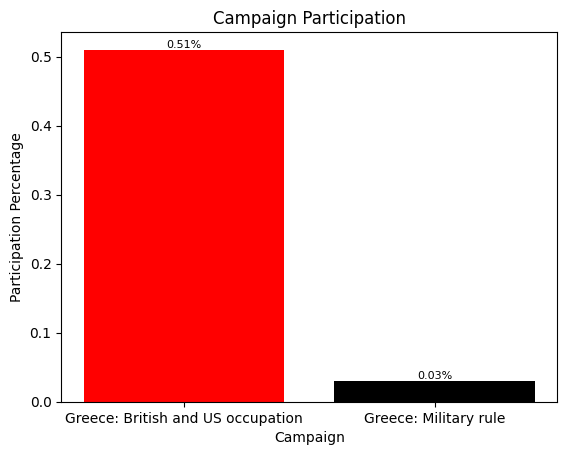

In [59]:
colors = Greece['SUCCESS'].map({1: 'black', 0: 'red'})

fig, ax = plt.subplots()
bars = ax.bar(Greece['CAMPAIGN_NAME'], Greece['Participation_Percentage'], color=colors)

for bar, percentage in zip(bars, Greece['Participation_Percentage']):
    ax.text( bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{percentage}%', ha='center', va='bottom', fontsize=8)
    
ax.set_title('Campaign Participation')
ax.set_xlabel('Campaign')
ax.set_ylabel('Participation Percentage')

plt.show()

## 3. The Effect of Participation on the Probability of Campaign Success

### The effect of participation on the probability of campaign success.

In this part we are going to analyse the assosiasion of success, membership per person and also the population of the nation. We are going to see relationships between them and then create a plot to depict the relations found.

For this question we will import the library statsmodel.api

In [60]:
import statsmodels.api as sm

As the participants will probably have a large margin between them we are logging them so the scale will be more short.

We create a new dataframe to work on for the section.

In [61]:
Success_prob = df

We will need the logged_population so we calculate the population as we have the participants and the percentage of them from the whole population in each campaign.

In [62]:
Success_prob['Population'] = Success_prob['PARTICIPATION']/Success_prob['PERCENTAGEPOPULARPARTICIPATION']

For the membership per person we divide the logged participants with the total population to find for each person how many participated.

In [63]:
Success_prob['membership_per_capita'] = np.log(Success_prob['PARTICIPATION'])/np.log(Success_prob['Population'])

In [64]:
Success_prob.head(1)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,CAMPAIGN_NAME,Participation_Percentage,Population,membership_per_capita
0,4.0,Afghans,Afghanistan,1978,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0,1970,Afghanistan: Afghan government,0.06,15600000.0,0.556087


Now we check if we have any NaN values in the participation column.

In [65]:
Success_prob[Success_prob['PARTICIPATION'].isna()]

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,CAMPAIGN_NAME,Participation_Percentage,Population,membership_per_capita
17,254.0,Pro-Independence Campaign,Aruba,1977,1977.0,Government of the Netherlands and the Netherla...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1970,Aruba: Government of the Netherlands and the N...,0.0,NaN,NaN
26,432.0,Popular Revolutionary Movement (Bolivia),Bolivia,1946,1946.0,Villarroel Regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1940,Bolivia: Villarroel Regime,0.0,NaN,NaN
45,236.0,Tutsi supremacists,Burundi,1991,1992.0,Buyoya regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,402.0,NaN,0.0,1.0,1.0,NaN,0.0,0.0,1.0,1990,Burundi: Buyoya regime,0.0,NaN,NaN
73,367.0,Anjouan Separatist Movement,Comoros,1997,2000.0,Comoros govt,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1267.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2000,Comoros: Comoros govt,0.0,NaN,NaN
79,64.0,Czech uprising,Czechoslovakia,1968,1968.0,Soviet occupation,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,228.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1960,Czechoslovakia: Soviet occupation,0.0,NaN,NaN
81,409.0,CNL,Democratic Republic of Congo,1964,1965.0,Mobutu regime,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,631.0,NaN,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1960,Democratic Republic of Congo: Mobutu regime,0.0,NaN,NaN
138,355.0,Telangana People's Front,India,1948,1952.0,Indian government,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1506.0,NaN,0.0,1.0,0.0,NaN,1.0,0.0,1.0,1950,India: Indian government,0.0,NaN,NaN
190,395.0,Hundred Day War,Lebanon,1978,1978.0,Syrian occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,255.0,NaN,0.0,1.0,0.0,NaN,1.0,1.0,0.0,1970,Lebanon: Syrian occupation,0.0,NaN,NaN
232,276.0,Anti-Somoza Strike,Nicaragua,1978,1978.0,Somoza regime,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,244.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1970,Nicaragua: Somoza regime,0.0,NaN,NaN


After finding the rows we are dropping them from the final dataframe we are going to use.

In [66]:
Success_prob = Success_prob.dropna(subset=['PARTICIPATION'])

We also need the logged population so we just .log() the corresponding column.

In [67]:
Success_prob['Logged_Population'] = np.log(Success_prob['Population'])

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\3156010736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Success_prob['Logged_Population'] = np.log(Success_prob['Population'])


Here we are setting up our **model**, as we see as independent variables we set the membership_per_capita and the Logged_Population.
For the dependend variable we set the SUCCESS column.

We set up the model using the statsmodel.api and calling the function Logit to specify a logistic regression model.

Then the .fit() function is used to estimate the coefficients between the predictors and the dependend column.

It is really important to use the .add_constant() for creating an intercept.

In [68]:
X = sm.add_constant(Success_prob[['membership_per_capita', 'Logged_Population']])

y = Success_prob['SUCCESS']

model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


After creating and fitting our model it is time to see our output and make some comments upon it:
* Let's see the most important column which is the one with the coefficients, we see that the membership_per_capita is larger than 0 meaning that the membership per person and the success have a positive relationship. On the other hand we see that the Logged_Population has a negative relation with the success outcome.
* Second very important variable is the P-value, if it is less than the significance level(0.05) then the variable is statistically significant. The membership_per_capita is 0 meaning there is an absolute relation and affecting impact in the success of a campaign while the Logged_Population is bigger than the P-value.
* The LLR is also low that it means that it was a significanly strong fit.
* Pseudo R-squared is at 12.9% that shows how much of the success variability is explained by the model, higher would be more desirable.


In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1297
Time:                        19:25:32   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.8142      1.496     -1.881      0.060      -5.746       0.118
membership_per_capita     7.6475      1.166      6.556      0.000       5.361       9.934
Logged_Population        -0.1388      0.074     -1.887      0.059      -0.283       0.005
=========================================================================================
"""

Let's go to **plotting**

We will need the probability data in the dataframe in order to depict them with the membership_per_capita. Here we will use the result.predict() to store the probabilities.

In [70]:
Success_prob['predicted_prob'] = result.predict(X)

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\3327884281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Success_prob['predicted_prob'] = result.predict(X)


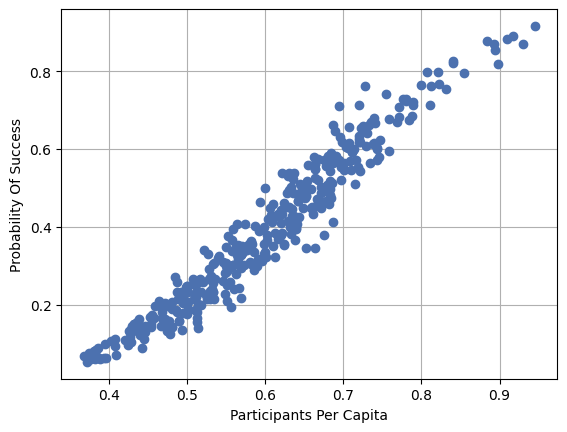

In [71]:
plt.scatter(Success_prob['membership_per_capita'], Success_prob['predicted_prob'],color = '#4C71AF')
plt.xlabel('Participants Per Capita')
plt.ylabel('Probability Of Success')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

**Conclusion:**
We need to see that for the same participats we can have many probabilities, the reason behind this is because of the 'Logged_Population' that has a negative relationship and so the model cannot really specify the probabilities.

### Same but with only the membership per capital as dependent variable.

Here we are following the same steps but this time we will not include the Logged_Population of the campaigns.

In [72]:
X = sm.add_constant(Success_prob['membership_per_capita'])

y = Success_prob['SUCCESS']

model2 = sm.Logit(y, X)
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


Some comments:
* The Pseudo R-squarred is 12.25%, it could be higher.
* The LLR is low < 0.05 so the model was effective.
* the coef for membership_per_capita is again higher than 0 so we have a positive relationship.
* The P-value is 0 that means the membership_per_capita affects the outcome of SUCCESS.

In [73]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        19:25:32   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.3469      0.709     -7.536      0.000      -6.737      -3.956
membership_per_capita     8.0495      1.141      7.052      0.000       5.812      10.287
=========================================================================================
"""

In [74]:
Success_prob['predicted_prob2'] = result2.predict(X)

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\2535822790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Success_prob['predicted_prob2'] = result2.predict(X)


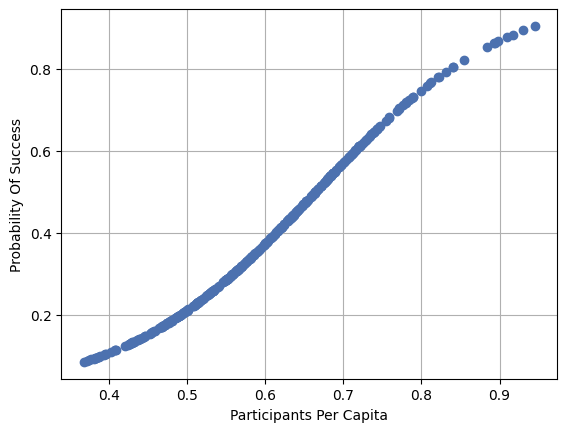

In [75]:
plt.scatter(Success_prob['membership_per_capita'], Success_prob['predicted_prob2'], color = '#4C71AF')

plt.xlabel('Participants Per Capita')
plt.ylabel('Probability Of Success')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

**Conclusion:**
The graph now that we are using only the membership_per_capita which has a positive relation with success is much better and more understandable. Here for each participation percentage we can see the probability of success. 

## The Level of Participation Tipping Point


In this part of our survey we will check the tipping point of participation for managing a certain success rate.

In favor of the mind of this 'rule' we are going to name the dataframe we will work on Chenoweth.

In [76]:
Chenoweth = pd.DataFrame()

As we working on participation we need to verify that the dataframe is clean from NaN values.

In [77]:
columns_to_check = ['PARTICIPATION']
df = df.dropna(subset=columns_to_check, how='any')

In [78]:
Chenoweth[['PERCENTAGEPOPULARPARTICIPATION','SUCCESS']] = df[['PERCENTAGEPOPULARPARTICIPATION','SUCCESS']]

In [79]:
columns_to_check = ['PERCENTAGEPOPULARPARTICIPATION']
Chenoweth = Chenoweth.dropna(subset=columns_to_check, how='any')

For this project we will need the percentage of population that participated in the peak point and also the binary success.

In [80]:
Chenoweth

,PERCENTAGEPOPULARPARTICIPATION,SUCCESS
0,0.000641,1.0
1,0.000685,1.0
2,0.000893,1.0
3,0.001625,0.0
4,0.091068,1.0
...,...,...
384,0.285063,1.0
385,0.002791,1.0
386,0.000277,1.0
387,0.000145,0.0


This is the method that categorizes the values based on their percentage of participation, it is a simple sum of 'if' statements.

In [81]:
def label_observations(participation):
    if participation > 0.035:
        return 'greater than 3.5%', 1
    elif participation > 0.01 : 
        return '1.0%-3.5%', 2
    elif participation > 0.0025 : 
        return '0.25% - 1.0%', 3
    elif participation  > 0.0006:
        return '0.06% - 0.25%', 4
    elif participation > 0.00015 : 
        return '0.015% - 0.06%', 5
    elif participation > 0.000035 : 
        return '0.0035% - 0.015%', 6
    else: 
        return 'less than 0.0035%', 7

We apply the method creating two new columns, one for the category and one unique ID for each category that we will need in the next steps.

In [82]:
Chenoweth[['Peak_Popular_Participation_%','ID']] = Chenoweth['PERCENTAGEPOPULARPARTICIPATION'].apply(label_observations).apply(pd.Series)

In [83]:
Chenoweth

,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,Peak_Popular_Participation_%,ID
0,0.000641,1.0,0.06% - 0.25%,4
1,0.000685,1.0,0.06% - 0.25%,4
2,0.000893,1.0,0.06% - 0.25%,4
3,0.001625,0.0,0.06% - 0.25%,4
4,0.091068,1.0,greater than 3.5%,1
...,...,...,...,...
384,0.285063,1.0,greater than 3.5%,1
385,0.002791,1.0,0.25% - 1.0%,3
386,0.000277,1.0,0.015% - 0.06%,5
387,0.000145,0.0,0.0035% - 0.015%,6


Let's validade that the categories were created fine.

In [84]:
Chenoweth['Peak_Popular_Participation_%'].unique()

array(['0.06% - 0.25%', 'greater than 3.5%', '0.25% - 1.0%',
       '0.015% - 0.06%', '0.0035% - 0.015%', '1.0%-3.5%',
       'less than 0.0035%'], dtype=object)

We count the number of campaigns in each category using the transform method.

In [85]:
Chenoweth['Observations'] = Chenoweth.groupby('Peak_Popular_Participation_%')['Peak_Popular_Participation_%'].transform('count')

In [86]:
Chenoweth.dtypes

PERCENTAGEPOPULARPARTICIPATION    float64
SUCCESS                           float64
Peak_Popular_Participation_%       object
ID                                  int64
Observations                        int64
dtype: object

In [87]:
Chenoweth

,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,Peak_Popular_Participation_%,ID,Observations
0,0.000641,1.0,0.06% - 0.25%,4,95
1,0.000685,1.0,0.06% - 0.25%,4,95
2,0.000893,1.0,0.06% - 0.25%,4,95
3,0.001625,0.0,0.06% - 0.25%,4,95
4,0.091068,1.0,greater than 3.5%,1,18
...,...,...,...,...,...
384,0.285063,1.0,greater than 3.5%,1,18
385,0.002791,1.0,0.25% - 1.0%,3,92
386,0.000277,1.0,0.015% - 0.06%,5,66
387,0.000145,0.0,0.0035% - 0.015%,6,44


Lastly for the success rate we fine the mean price for each unique ID. Here is were we needed the ID column, an integer value.

In [88]:
Chenoweth['Success_Rate'] = Chenoweth.groupby('ID')['SUCCESS'].transform('mean')


In [89]:
Chenoweth = Chenoweth.sort_values(by='ID')

In [90]:
Chenoweth

,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,Peak_Popular_Participation_%,ID,Observations,Success_Rate
295,0.450129,1.0,greater than 3.5%,1,18,0.888889
34,0.044641,0.0,greater than 3.5%,1,18,0.888889
14,0.302013,1.0,greater than 3.5%,1,18,0.888889
115,0.046501,1.0,greater than 3.5%,1,18,0.888889
187,0.094319,1.0,greater than 3.5%,1,18,0.888889
...,...,...,...,...,...,...
242,0.000017,0.0,less than 0.0035%,7,24,0.041667
238,0.000013,0.0,less than 0.0035%,7,24,0.041667
94,0.000015,0.0,less than 0.0035%,7,24,0.041667
335,0.000009,0.0,less than 0.0035%,7,24,0.041667


We drop the columns that we used for the calculations and are now useless.

In [91]:
columns_to_drop = ['PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'ID']
Chenoweth = Chenoweth.drop(columns=columns_to_drop)

We drop the duplicates values and reset the index to 0-6

In [92]:
Chenoweth = Chenoweth.drop_duplicates().reset_index(drop=True)

In [93]:
Chenoweth

,Peak_Popular_Participation_%,Observations,Success_Rate
0,greater than 3.5%,18,0.888889
1,1.0%-3.5%,41,0.609756
2,0.25% - 1.0%,92,0.456522
3,0.06% - 0.25%,95,0.452632
4,0.015% - 0.06%,66,0.242424
5,0.0035% - 0.015%,44,0.090909
6,less than 0.0035%,24,0.041667


We make the values of the column Success Rate into percentages, rounding them to two decimals and lastly placing the '%'. 

In [94]:
Chenoweth['Success_Rate'] = Chenoweth['Success_Rate'].apply(lambda x: f"{round(x * 100, 2)}%")

This is our final table, We can see the reason behind the rule of Chenoweth, we can see that for participation larger than 3.5% 88.89% of the occassion we have success.  

Let's check the **11.11%** (100% - 88.89% = 11.11%) of the observations which ignore this tendency, 'rule'.

In [95]:
df[(df['PERCENTAGEPOPULARPARTICIPATION'] >= 0.035) & (df['SUCCESS'] == 0.0)]

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,CAMPAIGN_NAME,Participation_Percentage,Population,membership_per_capita
19,255.0,Anti-King Hamad Campaign,Bahrain,2011,2014.0,Monarchy of King Hamad,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1050.0,100000.0,0.063816,1.0,0.0,1.0,0.0,0.0,0.0,2010,Bahrain: Monarchy of King Hamad,6.38,1566993.0,0.807094
34,383.0,Brunei Revolt,Brunei,1962,1962.0,Brunei government,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,4000.0,0.044641,1.0,0.0,NaN,0.0,1.0,1.0,1960,Brunei: Brunei government,4.46,89603.0,0.727348


We can see that the two that 'break' this rule are Bahrain and Brunei, we already explained the reasons that those two are considered outliers and why those two violate this tendency.
let's recall them : 

**Bahrain: Monarchy of King Hamad**
* The participation is not very high for the percentage that it represents, that is explained by the fact the Bahrain is a small island country located in the middle east and also this group of minority controling the country had also the support of Saudi Arabia so it also had their help againgst the campaign, so as it is obvious for these reasons it could not keep up with the rule.

**Brunei: Brunei government**
* Checking out the participation we understand that the percentage is high because their population is very low and also they had help from other nations, looking up for more information specifically from British military. (UK)

Based on these campaigns and the data we found it is a good tendency (rather than a rule) to say **"the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event."**

In [96]:
Chenoweth

,Peak_Popular_Participation_%,Observations,Success_Rate
0,greater than 3.5%,18,88.89%
1,1.0%-3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


### Percentage of the population that is the tipping point for success in a campaign with 99% probability.

The table should be interpreted as a depiction of the observed outcomes rather than a table of probabilities of success based on the participation levels.

For this reason we will see statistically based on probabilities the participation needed for 99% success probability.

We set up the model we used in the previous step for the membership per capita as the independend and the SUCCESS as the dependend. We are using this model because the other one were scatter cause the synergy of the two X variables created a scattered graph.

We also find the probabilities as before using the result3 model we created and also we create confidence intervals using the .conf_int() and setting an alpha for the significance level of our confidence intervals.

In [97]:
X = sm.add_constant(Success_prob['membership_per_capita'])
y = Success_prob['SUCCESS']
model = sm.Logit(y, X)
result3 = model.fit()

pred_prob = result3.predict(X)

pred_ci = result3.get_prediction(X).conf_int(alpha = 0.000000000001)

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


In [98]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        19:25:32   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.3469      0.709     -7.536      0.000      -6.737      -3.956
membership_per_capita     8.0495      1.141      7.052      0.000       5.812      10.287
=========================================================================================
"""

Here we can the probabilities for each membership per capita.

In [99]:
pred_prob

0      0.295117
1      0.298870
2      0.345998
3      0.434322
4      0.804936
         ...   
384    0.884145
385    0.432853
386    0.202945
387    0.139988
388    0.255078
Length: 380, dtype: float64

We also print the confidence intervals for each probability.

In [100]:
pred_ci

array([[0.14041177, 0.51763083],
       [0.14368472, 0.51990155],
       [0.18455508, 0.55290832],
       [0.25076568, 0.63785251],
       [0.35389448, 0.96883597],
       [0.27408065, 0.68502975],
       [0.27456814, 0.686163  ],
       [0.12588806, 0.50806273],
       [0.30108351, 0.75938955],
       [0.20521365, 0.57399716],
       [0.25517996, 0.64583016],
       [0.01941018, 0.4497868 ],
       [0.0674571 , 0.47536901],
       [0.0465452 , 0.46470813],
       [0.36272061, 0.99222348],
       [0.33316716, 0.88346434],
       [0.29918855, 0.75331624],
       [0.1786653 , 0.54752322],
       [0.34852421, 0.94907751],
       [0.01935158, 0.44975015],
       [0.01151009, 0.44440503],
       [0.22502522, 0.59823356],
       [0.31920236, 0.82480981],
       [0.28103713, 0.70186276],
       [0.30377067, 0.76824679],
       [0.29497822, 0.74032128],
       [0.33089496, 0.87358238],
       [0.31499326, 0.80842292],
       [0.02771157, 0.45468799],
       [0.3290893 , 0.86579652],
       [0.

Next step now is to create dataframes so we can create one mutual dataframe for the probabilities, the intervals and also the membership per capita and the participation percentage that we will need for the 99% probability of success. 

We also reset the index because the previous one had some false values.

In [101]:
pred_prob = pd.DataFrame(pred_prob, columns=['probabilities']).reset_index()

In [102]:
pred_prob

,index,probabilities
0,0,0.295117
1,1,0.298870
2,2,0.345998
3,3,0.434322
4,4,0.804936
...,...,...
375,384,0.884145
376,385,0.432853
377,386,0.202945
378,387,0.139988


Here we gather in one dataframe the column membership per capita and percentage of participation.

We also reset the index because the previous one had some false values.

In [103]:
membership_participation = Success_prob[['membership_per_capita', 'PERCENTAGEPOPULARPARTICIPATION']].reset_index()

In [104]:
membership_participation

,index,membership_per_capita,PERCENTAGEPOPULARPARTICIPATION
0,0,0.556087,0.000641
1,1,0.558320,0.000685
2,2,0.585154,0.000893
3,3,0.631423,0.001625
4,4,0.840339,0.091068
...,...,...,...
375,384,0.916722,0.285063
376,385,0.630680,0.002791
377,386,0.494303,0.000277
378,387,0.438722,0.000145


We merge them on the indexes.

In [105]:
membership_prob = pd.merge(membership_participation, pred_prob, left_index=True, right_index=True)

We drop the two index columns we don't need anymore.

In [106]:
membership_prob = membership_prob.drop(columns=['index_x','index_y'])

In [107]:
membership_prob

,membership_per_capita,PERCENTAGEPOPULARPARTICIPATION,probabilities
0,0.556087,0.000641,0.295117
1,0.558320,0.000685,0.298870
2,0.585154,0.000893,0.345998
3,0.631423,0.001625,0.434322
4,0.840339,0.091068,0.804936
...,...,...,...
375,0.916722,0.285063,0.884145
376,0.630680,0.002791,0.432853
377,0.494303,0.000277,0.202945
378,0.438722,0.000145,0.139988


Now that we have gathered our essential data for the step, let's see the confidence intervals.

In [108]:
pred_ci = pd.DataFrame(pred_ci, columns=['lower_bound', 'upper_bound']).reset_index()

In [109]:
pred_ci

,index,lower_bound,upper_bound
0,0,0.140412,0.517631
1,1,0.143685,0.519902
2,2,0.184555,0.552908
3,3,0.250766,0.637853
4,4,0.353894,0.968836
...,...,...,...
375,375,0.361749,0.990362
376,376,0.249839,0.636228
377,377,0.066849,0.475058
378,378,0.030605,0.456297


In [110]:
result_df = pd.merge(membership_prob, pred_ci, left_index=True, right_index=True)

In [111]:
result_df

,membership_per_capita,PERCENTAGEPOPULARPARTICIPATION,probabilities,index,lower_bound,upper_bound
0,0.556087,0.000641,0.295117,0,0.140412,0.517631
1,0.558320,0.000685,0.298870,1,0.143685,0.519902
2,0.585154,0.000893,0.345998,2,0.184555,0.552908
3,0.631423,0.001625,0.434322,3,0.250766,0.637853
4,0.840339,0.091068,0.804936,4,0.353894,0.968836
...,...,...,...,...,...,...
375,0.916722,0.285063,0.884145,375,0.361749,0.990362
376,0.630680,0.002791,0.432853,376,0.249839,0.636228
377,0.494303,0.000277,0.202945,377,0.066849,0.475058
378,0.438722,0.000145,0.139988,378,0.030605,0.456297


Once again we drop the index column

In [112]:
result_df = result_df.drop(columns=['index'])

In [113]:
result_df

,membership_per_capita,PERCENTAGEPOPULARPARTICIPATION,probabilities,lower_bound,upper_bound
0,0.556087,0.000641,0.295117,0.140412,0.517631
1,0.558320,0.000685,0.298870,0.143685,0.519902
2,0.585154,0.000893,0.345998,0.184555,0.552908
3,0.631423,0.001625,0.434322,0.250766,0.637853
4,0.840339,0.091068,0.804936,0.353894,0.968836
...,...,...,...,...,...
375,0.916722,0.285063,0.884145,0.361749,0.990362
376,0.630680,0.002791,0.432853,0.249839,0.636228
377,0.494303,0.000277,0.202945,0.066849,0.475058
378,0.438722,0.000145,0.139988,0.030605,0.456297


We got our dataframe ready for our crusial step.

In [114]:
result_df = result_df.sort_values(by='probabilities')

**Commmets on the plot:**
* First we plot the membersip per capita with it's probability of success.
* Next step, we create the space of the confidence intervals to see how much a probability of success can vary.
* We enable grid for better understanding.
* We plot the red line which represents the probability of success we are looking for.

In [115]:
result_df = result_df.sort_values(by='membership_per_capita')

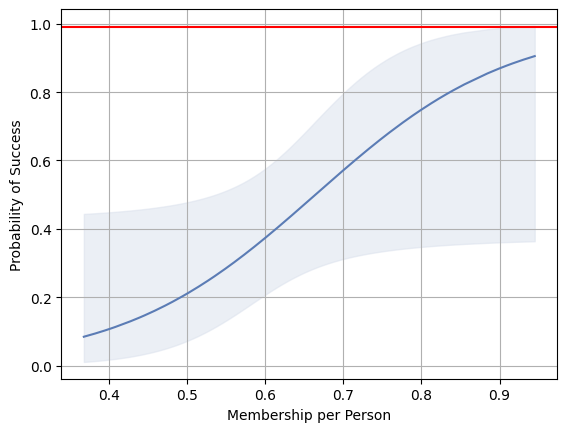

In [116]:
plt.plot(result_df['membership_per_capita'], result_df['probabilities'],color = '#5B7CB5', label='Predicted Probability of Success')
plt.fill_between(result_df['membership_per_capita'],result_df['lower_bound'], result_df['upper_bound'], color='#D9E0EC', alpha=0.5, label='95% CI')


plt.xlabel('Membership per Person')
plt.ylabel('Probability of Success')
plt.grid(True)
plt.axhline(y=0.99, color='red', label='0.99 Probability of Success')

plt.show()

**Last step** is to find the upper bounds that touch the red line of 99% probability of success to see which is the minimum percentage of participation.

We keep only the rows with upper bound touching the red line.

In [117]:
final_df = result_df[result_df['upper_bound']>=0.99]

We find the minimun of them.

In [118]:
final_df['upper_bound'].min()

0.9903618798732311

The least percentage of participation needed to accomplish 99% probability of success is the minimun upper bound found.

In [119]:
final_df['PERCENTAGEPOPULARPARTICIPATION'].min()

0.2850627137970353

In [120]:
final_df

,membership_per_capita,PERCENTAGEPOPULARPARTICIPATION,probabilities,lower_bound,upper_bound
375,0.916722,0.285063,0.884145,0.361749,0.990362
14,0.930431,0.302013,0.894978,0.362721,0.992223
286,0.944982,0.450129,0.905489,0.363647,0.993813


In our occassion is the 28.5% of participation from our total population.

**Conclusion:**
We need at least the participation of 28.5% of the total population so as to be there a probability of 99% success outcome.
As much the participation percentage increases, so does and then probability of showing 99% success outcome.

## Nonviolent Resistance and Target Regime Type

In our last part of the survey we are going to analyse whether the regime type has a significant role in the non violent campaigns. 

Step 1 is to import the regime type in the dataframe we are working on.

In [121]:
p5 = pd.read_excel('p5v2018.xls')

In [122]:
p5

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17569,1,5522014,552,ZIM,Zimbabwe,2014,0,0.0,5,1,4,4.0,1.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17570,1,5522015,552,ZIM,Zimbabwe,2015,0,0.0,5,1,4,4.0,2.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17571,1,5522016,552,ZIM,Zimbabwe,2016,0,0.0,5,1,4,4.0,3.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17572,1,5522017,552,ZIM,Zimbabwe,2017,0,0.0,5,1,4,4.0,4.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To do this we create a new polityV column where we import the polity2 column from our new dataframe we just imported.

We are using polity2 and not polity because it modifies the combined annual POLITY score(-66, -77, and -88) to conventional polity scores (-10 to 10) 
* -66 Cases of foreign 'interruption' are inplace with NaN for 'missing values'.
  
* -77 Cases of 'interregnum', or anarchy, are converted to a 'neutral' Polity score using the 0 value.
  
* -88 Cases of 'transition' are counted in a proportional manner throughout the entire period of that transition.

In [123]:
PolityV = df

In [124]:
PolityV['polityV'] = PolityV.apply(
    lambda row: p5.loc[(p5['year'] == row['EYEAR']) & (p5['country'] == row['LOCATION']), 'polity2'].values[0]
    if not p5[(p5['year'] == row['EYEAR']) & (p5['country'] == row['LOCATION'])].empty
    else None,
    axis=1
)

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\49473769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PolityV['polityV'] = PolityV.apply(


In this step we must clarify that in the polityV column we have values from -10 to 10. If the polityV is smaller than 0 then we are talking about an absolutist regime nation. If its larger than 0 then we are talking about a democratic one.

In [125]:
PolityV['polityV']

0      NaN
1     -8.0
2     -7.0
3     -1.0
4      3.0
      ... 
384    NaN
385    6.0
386    5.0
387    NaN
388   -6.0
Name: polityV, Length: 380, dtype: float64

Important first step before we use the statsmodel is clean our dataframe from NaN values for the column we are going to use.

In [126]:
columns_to_check = ['PARTICIPATION', 'polityV']
PolityV = PolityV.dropna(subset=columns_to_check, how='any')

In [127]:
PolityV

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,CAMPAIGN_NAME,Participation_Percentage,Population,membership_per_capita,polityV
1,3.0,Afghan resistance,Afghanistan,1980,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0,1980,Afghanistan: Soviet occupation,0.07,1.460000e+07,0.558320,-8.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0,1990,Afghanistan: Afghan regime,0.09,2.240000e+07,0.585154,-7.0
3,217.0,Taliban,Afghanistan,2001,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0,2010,Afghanistan: Afghan government,0.16,3.692109e+07,0.631423,-1.0
4,5.0,Albanian anti-communist,Albania,1990,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0,1990,Albania: Communist regime,9.11,3.294227e+06,0.840339,3.0
5,6.0,Algerian Revolt/National Liberation Front,Algeria,1954,1962.0,French occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2695.0,39000.0,0.003545,1.0,0.0,NaN,1.0,0.0,1.0,1960,Algeria: French occupation,0.35,1.100000e+07,0.652011,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,119.0,Kosovo Albanian,Yugoslavia,1988,1998.0,Serbian rule,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3390.0,10000.0,0.000943,1.0,0.0,1.0,0.0,0.0,1.0,1990,Yugoslavia: Serbian rule,0.09,1.060000e+07,0.569370,-6.0
380,61.0,Croats,Yugoslavia,1991,1992.0,Serb government,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,245.0,12500.0,0.001190,1.0,0.0,NaN,1.0,0.0,0.0,1990,Yugoslavia: Serb government,0.12,1.050000e+07,0.583507,-5.0
385,248.0,Zambia anti-single party rule,Zambia,1990,1991.0,One-party rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,488.0,23000.0,0.002791,1.0,0.0,0.0,1.0,0.0,0.0,1990,Zambia: One-party rule,0.28,8.239732e+06,0.630680,6.0
386,12.0,anti-Chiluba campaign,Zambia,2001,2001.0,Chiluba regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,213.0,3000.0,0.000277,0.0,0.0,0.0,0.0,0.0,0.0,2000,Zambia: Chiluba regime,0.03,1.082412e+07,0.494303,5.0


We import the statsmodel.api library.

In [128]:
import statsmodels.api as sm

As we have already told we are going to analyse the effect of the regime type only for the non violent so we keep only the non violent campaigns for this part of our survey.

In [129]:
PolityV_subset = PolityV[PolityV['NONVIOL'] == 1.0]

For our statistics model we will need the logged participation and logged population so we create new columns for them and calculate them respectively.

In [130]:
PolityV_subset['Logged_Participation'] = np.log(PolityV_subset['PARTICIPATION'])

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\1340319589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PolityV_subset['Logged_Participation'] = np.log(PolityV_subset['PARTICIPATION'])


We have aldready counted the Population column in a previous step, so have it as a column to calculate it's logged.

In [131]:
PolityV_subset['Logged_Population'] = np.log(PolityV_subset['Population'])

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\1196581710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PolityV_subset['Logged_Population'] = np.log(PolityV_subset['Population'])


We set up the data we will use, in X we place the constants regime type(polityV), the logged population and logged participation we just calculated.

In [132]:
y = PolityV_subset['SUCCESS']
X = sm.add_constant(PolityV_subset[['polityV', 'Logged_Population', 'Logged_Participation']])


We create our model using the .Logit() and finally fit in our data.

In [133]:
model4 = sm.Logit(y, X)
result4 = model4.fit()

Optimization terminated successfully.
         Current function value: 0.571361
         Iterations 5


**Some comments upon it:**
* Pseudo R-squared is at 15.25% which means that 15.25% of the outputs of the SUCCESS are justify by those three metrics(we always prefer it larger).
* LLR p-value is very small as we desire it(<0.05) so our model has significant importance.
* The coefficients for polityV and logged participation are positive with the logged participation being higher, that means that those two metrics affect the success output positively following the same developments.
* The coefficient for logged population is negative which means that it affects in a part the output of the Success in a negative way.
* The p value for the polityV is 0 meaning that polityV is really significant for the output of the success and important in our model.
* The p value for the logged_participation is smaller than 0.05 which also means that is significant in our model.
* The p value for the logged population is larger than 0.05 (the margin though from 0.05 is not large) meaning that this metric in not as much important in our model but still affects it.

In [134]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  134
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1525
Time:                        19:25:35   Log-Likelihood:                -76.562
converged:                       True   LL-Null:                       -90.343
Covariance Type:            nonrobust   LLR p-value:                 4.489e-06
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8905      2.205     -0.404      0.686      -5.212       3.431
polityV                  0.1565      0.039      4.047      0.000       0.081       0.232
Logged_Population       -0.0880      0.145     -0.605      0.545      -0.373       0.197
Logged_Participation     0.2411      0.111      2.162      0.031       0.023       0.460
========================================================================================
"""

We place the probabilities in our dataframe for visualization using the .predict()

In [135]:
PolityV_subset['predicted_prob'] = result4.predict(X)

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\4150096766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PolityV_subset['predicted_prob'] = result4.predict(X)


We create our scatter plot with the polityV and the predicted_prob.

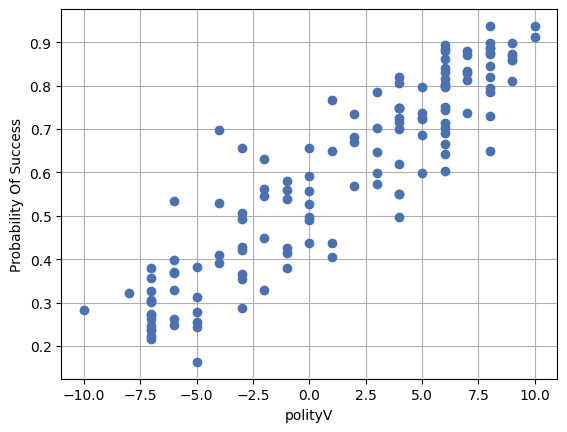

In [136]:
plt.scatter(PolityV_subset['polityV'], PolityV_subset['predicted_prob'], color = '#4C71AF')
plt.xlabel('polityV')
plt.ylabel('Probability Of Success')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

**Conclusion:**
Our graph is scatter in a lot of places. The reason behing this is the logged population that had a negative relation and also in a very small percentage the logged participation that wasn't absolutely related with the SUCCESS output.
Regardless of these observations we can see an ascending tendency from the -10(monarchy) of the regime type to the 10(democratic). That means that the non violent campaigns have more possibilities to be succesfull in a democratic environment. Though we can still see that for the dictatorship environments there are still good possibilites of success, ranging from 20% to 70% in some occassions. 

## Second Approach:
In the previous one we took the polityV of the end year for each country & campaign.

The problem is that in a single campaign, the regime type can change during the campaign, so we are deciding to check on another perspective, this time we are going to see for the mean price for each country and campaign.

Let's see an example of what we were doing and what we want to do. 
* Were doing: For the country Afghanistan(and for each other country) we went to the dataframe p5 and specifically in the column polity2 and found the polity2 that matched the end year of each campaign in the country Afghanistan.
* What we want to do: We want for the country Afghanistan(and for each other country) to find in the dataframe p5 **all** the polity2 values for the whole duration of each campaign [start year : end year] and calculate the **mean price**.
  
**Why do this?**
The regime type may change in the duration of the campaign and it would be false to say that the specific regime type of the end year(peak point) had to do with the overall efficiency and outcome of the campaign.

In [137]:
df[df['LOCATION'] == 'Afghanistan']

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,Decade,CAMPAIGN_NAME,Participation_Percentage,Population,membership_per_capita,polityV
0,4.0,Afghans,Afghanistan,1978,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0,1970,Afghanistan: Afghan government,0.06,1.560000e+07,0.556087,NaN
1,3.0,Afghan resistance,Afghanistan,1980,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0,1980,Afghanistan: Soviet occupation,0.07,1.460000e+07,0.558320,-8.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0,1990,Afghanistan: Afghan regime,0.09,2.240000e+07,0.585154,-7.0
3,217.0,Taliban,Afghanistan,2001,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0,2010,Afghanistan: Afghan government,0.16,3.692109e+07,0.631423,-1.0


In [138]:
p5[p5['country'] == 'Afghanistan']

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0,7002014,700,AFG,Afghanistan,2014,0,2.0,1,2,-1,-1.0,0.0,2,1,4,4,1,0,3.0,4,4.0,-7.0,10.0,7.0,2001.0,1.0,-66.0,12.0,29.0,2014.0,2.0,-1.0,6.0,1.0,NaN,1.0
215,0,7002015,700,AFG,Afghanistan,2015,0,2.0,1,2,-1,-1.0,1.0,2,1,4,4,1,0,3.0,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,0,7002016,700,AFG,Afghanistan,2016,0,2.0,1,2,-1,-1.0,2.0,2,1,4,4,1,0,3.0,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,0,7002017,700,AFG,Afghanistan,2017,0,2.0,1,2,-1,-1.0,3.0,2,1,4,4,1,0,3.0,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will be working on a polityV dataframe named polityV2 as it is a second approach.

In [139]:
polityV2 = pd.DataFrame()

We are copying the values of the df dataframe(our main one)

In [140]:
polityV2 = df

In this method for each row of the polityV2 dataframe, for each unique country and campaign, we go into all the rows of the p5 dataframe from the start year to the end year and gather all the polity2 values, then we calculate their mean price and return the value in a column names 'polityV' of the polityV2 dataframe.

In [141]:
def calculate_mean_price(row):
    relevant_prices = p5.loc[(p5['country'] == row['LOCATION']) & (p5['year'] >= row['BYEAR']) & (p5['year'] <= row['EYEAR']), 'polity2']
    return relevant_prices.mean()

In [142]:
polityV2['polityV'] = polityV2.apply(calculate_mean_price, axis=1)

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\3733579197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polityV2['polityV'] = polityV2.apply(calculate_mean_price, axis=1)


From now on we are following the same steps as before, We:
* Drop any NaN values from the column participation and polityV

In [143]:
columns_to_check = ['PARTICIPATION', 'polityV']
polityV2 = polityV2.dropna(subset=columns_to_check, how='any')

* We keep only the columns with non violent campaigns.

In [144]:
polityV2_subset = polityV2[polityV2['NONVIOL'] == 1.0]

* We calculate the logged_participation and logged population (keep in mind that the population was calculated in another step in our survey)

In [145]:
polityV2_subset['Logged_Participation'] = np.log(polityV2_subset['PARTICIPATION'])

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\2698439851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polityV2_subset['Logged_Participation'] = np.log(polityV2_subset['PARTICIPATION'])


In [146]:
polityV2_subset['Logged_Population'] = np.log(polityV2_subset['Population'])

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\3984366460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polityV2_subset['Logged_Population'] = np.log(polityV2_subset['Population'])


* We finally set up our model

In [147]:
y = polityV2_subset['SUCCESS']
X = sm.add_constant(polityV2_subset[['polityV', 'Logged_Population', 'Logged_Participation']])

In [148]:
model5 = sm.Logit(y, X)
result5 = model5.fit()

Optimization terminated successfully.
         Current function value: 0.605239
         Iterations 5


**Let's see the differences with the previous approach**

**Differences:**
* Pseudo R-square is lower than before, it is 10.67%
* LLR is again low but larger than the previous approach, so the previous was most significant important.
* The coefficients have some differences, the logged population is larger as a negative relation, showing bigger negative impact, and this time has p value of 0.153
* The other ones seem to have smalle differences with the polityV coefficient being slighter smaller and the p value slightly bigger (0.003)
* The logged participation has a coefficient slightly bigger and also a p value smaller (0.006, previous one: 0.031)

In [149]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  134
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1525
Time:                        19:25:35   Log-Likelihood:                -76.562
converged:                       True   LL-Null:                       -90.343
Covariance Type:            nonrobust   LLR p-value:                 4.489e-06
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8905      2.205     -0.404      0.686      -5.212       3.431
polityV                  0.1565      0.039      4.047      0.000       0.081       0.232
Logged_Population       -0.0880      0.145     -0.605      0.545      -0.373       0.197
Logged_Participation     0.2411      0.111      2.162      0.031       0.023       0.460
========================================================================================
"""

In [150]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  136
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1067
Time:                        19:25:35   Log-Likelihood:                -82.313
converged:                       True   LL-Null:                       -92.139
Covariance Type:            nonrobust   LLR p-value:                 0.0002003
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4334      2.071      0.209      0.834      -3.626       4.493
polityV                  0.1112      0.038      2.956      0.003       0.037       0.185
Logged_Population       -0.1960      0.137     -1.430      0.153      -0.465       0.073
Logged_Participation     0.2983      0.108      2.775      0.006       0.088       0.509
========================================================================================
"""

In [151]:
polityV2_subset['predicted_prob'] = result5.predict(X)

C:\Users\falin\AppData\Local\Temp\ipykernel_18332\307764525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polityV2_subset['predicted_prob'] = result5.predict(X)


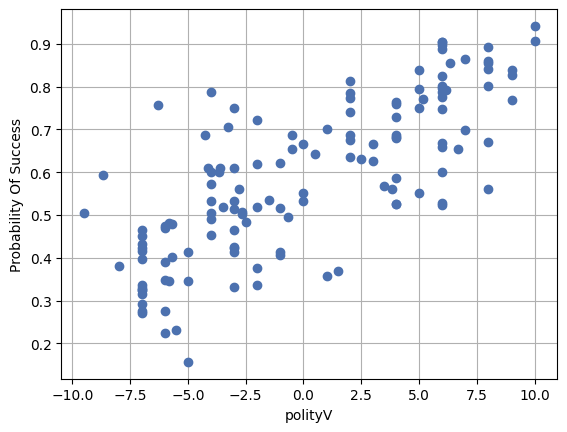

In [152]:
plt.scatter(polityV2_subset['polityV'], polityV2_subset['predicted_prob'], color = '#4C71AF')
plt.xlabel('polityV')
plt.ylabel('Probability Of Success')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

**Conclusion:**
The plot is again scatter this time much more, the reason behind this, is the larger negative relation with the population.
We can still see the ascending tendency but this time more scattered. This time though our data are more specific than before.

It is up to the reader to choose the right graph

Keep in mind that:
* In the first graph we can see better the affect of the polityV in the probability of success(the population and the participation had smaller affect).
* In the second graph we have more trust in the data we are using as we are taking into account the regime change each year.